                                                    Simulation HW

Study the provided code and simulate. Play with the parameters (n,p) and number of experiments to gain an understanding of the simulations. You can use the provided code as you deem fit. I ran it using VS Code with the Jupyter extension. I used Python 3.10.9 installed as part of anaconda 3.

All your code must be submitted  as a single ipynb file. Use different cells for different questions. Use markdowns to explain what you are doing and your observations. You can use more than one cell for a question to segregate your code for clarity.



                                                        Question 1

We will model a coin that gives heads with probability $0.2$ as a Bernoulli $(0.2)$ RV. 

(a) Toss the coin $20$ times. Plot the outcomes against the trial number. You must label the plot appropriately. Explain what you observe in the plot.

(b) Now repeat the above 5 times. Plot the outcomes for each repeat against the trial number, all on the same figure. You must label the plot appropriately. Explain what you observe in the plot.

For the plots, you may want to use 

        matplotlib.pyplot.step(x, y, *args, where='pre', data=None, **kwargs)

(c) Repeat (a) $100$ times. You will end up with $100$ sequences each of length $20$. Store them in an appropriate array. For each sequence, calculate the total number of $1$ (s) and plot their histogram (with frequency of occurance on the y-axis). Which PMF does the histogram approximate?

(d) Starting with the array you obtained in (c), choose all those sequences that sum to at least $3$. For each such sequence, calculate the total number of $1$ (s) and plot their histogram (with frequency of occurance on the y-axis). Which PMF does the histogram approximate?



Ans 1(a)] $(Bernauli RV)$

        - Bernauli Paramneter - p = Probability of succes ie mapped 1
        - No of trials in 1 experiment - n
        - No of times experiment is to be repeated - e



Steps:


    - We will genrate a array of size [e,n] with random numbers between [0,1], for each number is it is less than p we will assign it with success ie 1 else loss ie 0.
    - We now have a new array with 0s and 1s
    - We will now plot this, 0 and 1 on X axis & corresponding frequency/n on Y axis

Given Data:

        - p = 0.2
        - number of trials in 1 experiment = 20
        - number of experiment repeats = 1                                               

In [275]:
import numpy as np

#Defining A Function For Bernauli RV

def bernauli(p=0.5,n=10,e=1,ProfitLoss=[1,0],seed=1236):
    seed_value = seed #Seed genrates same values for diffrent executions for same 'seed values'
    rng = np.random.default_rng(seed_value) 
    rand_arr = rng.random(size=(e, n))
    #print(rand_arr)
    index_profit = np.less_equal(rand_arr, p)
    #print(index_profit)
    rand_arr[index_profit] = ProfitLoss[0]
    #print(rand_arr)
    rand_arr[np.invert(index_profit)] = ProfitLoss[1]
    #print(rand_arr)
    final_arr = rand_arr.astype('i')
    return final_arr  

In [276]:
#Setting Given Values
numTrialsInAnExp = 20
numRepeatsOfExp = 1
bernoulliParam_p = 0.2

#Genrated Values
ber_arr = bernauli(bernoulliParam_p,numTrialsInAnExp,numRepeatsOfExp)
print("The array of observations is (Each row corresponds to an experiment repeat):\n",ber_arr,"\n") 


The array of observations is (Each row corresponds to an experiment repeat):
 [[0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]] 



In [277]:
#Genrated Values
ber_arr = bernauli(bernoulliParam_p,numTrialsInAnExp,numRepeatsOfExp)
print("The array of observations is (Each row corresponds to an experiment repeat):\n",ber_arr,"\n") 

The array of observations is (Each row corresponds to an experiment repeat):
 [[0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]] 



In [278]:
#Experimental PDF

freq_arr = np.sum(ber_arr,axis=1)
print("Number of ones per experiment of %s trials is:\n" %numTrialsInAnExp,freq_arr,"\n")

freq_01_arr = [x/numTrialsInAnExp for x in freq_arr]
print("Frequency of ones per experiment:\n" ,freq_01_arr,"\n")

Number of ones per experiment of 20 trials is:
 [3] 

Frequency of ones per experiment:
 [0.15] 



In [279]:
# Count the number of 0's and 1's in the array
num_zeros = np.count_nonzero(ber_arr == 0)
num_ones = np.count_nonzero(ber_arr == 1)
print("Number of Failures - 0's:", num_zeros)
print("Number of Success - 1's:", num_ones)


histfreq = [num_zeros,num_ones]
histVal = [num/(numTrialsInAnExp*numRepeatsOfExp) for num in histfreq]

#Final Data
print("\nNo. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp is " + str(numRepeatsOfExp))
print("\nFreq of Loss - 0's:", histVal[0])
print("Freq of Success - 1's:", histVal[1])

Number of Failures - 0's: 17
Number of Success - 1's: 3

No. of Trials per Bern Exp is 20 & No. of Exp is 1

Freq of Loss - 0's: 0.85
Freq of Success - 1's: 0.15


Text(0.5, 1.0, 'No. of Trials per Bern Exp is 20 & No. of Exp is 1')

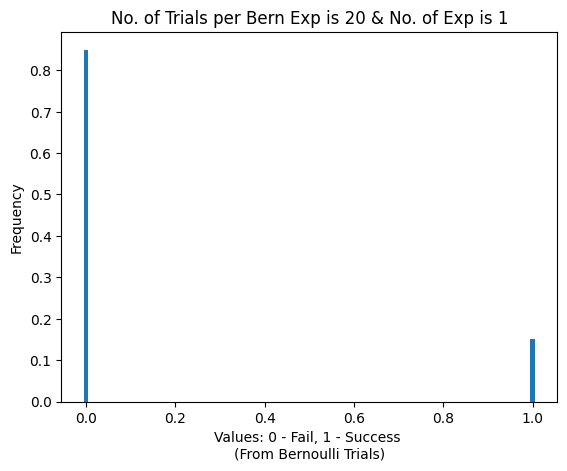

In [280]:
#Plotting The DATA

import matplotlib.pyplot as plt
fig1, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True) #Plot Raw Figure

ax1.bar([0, 1], histVal, width = 0.01) #Plot values as Bar Graphs

#Label X & Y axes
ax1.set_xlabel("Values: 0 - Fail, 1 - Success \n(From Bernoulli Trials)")
ax1.set_ylabel("Frequency")

#Label the Figure 1
ax1.set_title("No. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp is " + str(numRepeatsOfExp))

Observations -

        - Observed value of p = 0.15 
        - Actual value of p [PMF] = 0.20

Ans 1(b)] $(Bernauli RV)$

Steps:


    - We will repeat the above 5 times
    - We will now plot these 5 values of 0 and 1s on X axis & corresponding frequency on Y axis, on same graph

Given Data:

        - p = 0.2
        - number of trials in 1 experiment = 20
        - number of experiment repeats = 5

In [281]:
numTrialsInAnExp = 20
numRepeatsOfExp = 5
bernoulliParam_p = 0.2

ber_arr = bernauli(bernoulliParam_p,numTrialsInAnExp,numRepeatsOfExp)
print("The array of observations is (Each row corresponds to an experiment repeat):\n",ber_arr,"\n") 

freq_arr = np.sum(ber_arr,axis=1)
print("Number of ones per experiment of %s trials is:\n" %numTrialsInAnExp,freq_arr,"\n")

freq_01_arr = [x/numTrialsInAnExp for x in freq_arr]
print("Frequency of Success - 1s per experiment:\n" ,freq_01_arr,"\n")

freq_00_arr = [1-(x/numTrialsInAnExp) for x in freq_arr]
print("Frequency of Failure - 0s per experiment:\n" ,freq_00_arr,"\n")

#All this is same as above ie Ans1.A

The array of observations is (Each row corresponds to an experiment repeat):
 [[0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0]] 

Number of ones per experiment of 20 trials is:
 [3 5 2 2 4] 

Frequency of Success - 1s per experiment:
 [0.15, 0.25, 0.1, 0.1, 0.2] 

Frequency of Failure - 0s per experiment:
 [0.85, 0.75, 0.9, 0.9, 0.8] 



Observed value of p = 0.16


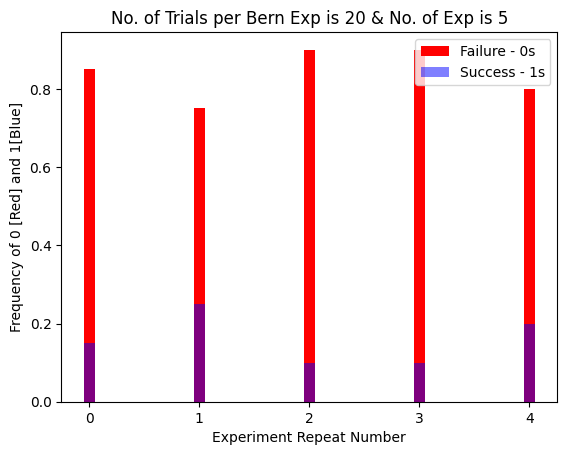

In [282]:
print("Observed value of p = " + str(np.sum(freq_01_arr)/numRepeatsOfExp))

#Plotting the values of 0s and 1s against each experiment repeat on a same figure

import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_bar_graphs(frequencies_0, frequencies_1,numRepeatsOfExp=1,numTrialsInAnExp=1):
    x = np.arange(numRepeatsOfExp)  # X-axis values - Experiment Number (0, 1, 2, 3, 4)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plotting the 0s bar graph
    ax.bar(x, frequencies_0, color='red', width = 0.1, label='Failure - 0s')

    # Plotting the 1s bar graph
    ax.bar(x, frequencies_1, color='blue',width = 0.1, label='Success - 1s', alpha=0.5)

    # Label the plot
    ax.set_xlabel('Experiment Repeat Number')
    ax.set_ylabel('Frequency of 0 [Red] and 1[Blue]')
    ax.set_title("No. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp is " + str(numRepeatsOfExp))
    ax.legend()

    # Show the plot
    plt.show()

plot_multiple_bar_graphs(freq_00_arr,freq_01_arr,numRepeatsOfExp,numTrialsInAnExp)

Observations -

        - Observed value of p = 0.10, 0.15, 0.20 , 0.25 => p ~ 0.16
        - As we increase the number of experiments [Frequentist Approach] we get more closer to 'p' or Bernauli PMF
        - Actual value of p [PMF] = 0.20

Ans 1(c)] $(Bernauli RV)$

Steps:


    - We will repeat the above 100 times
    - We will now plot values of 1 corresponding to 100 values of experiment repeat on X axis & corresponding frequency on Y axis, on same graph

Given Data:

        - p = 0.2
        - number of trials in 1 experiment = 20
        - number of experiment repeats = 100

In [283]:
numTrialsInAnExp = 20
numRepeatsOfExp = 100
bernoulliParam_p = 0.2

ber_arr = bernauli(bernoulliParam_p,numTrialsInAnExp,numRepeatsOfExp)
print("The array of observations is (Each row corresponds to an experiment repeat):\n",ber_arr,"\n") 

freq_arr = np.sum(ber_arr,axis=1)
print("Number of ones per experiment of %s trials is:\n" %numTrialsInAnExp,freq_arr,"\n")

freq_01_arr = [x/numTrialsInAnExp for x in freq_arr]
print("Frequency of Success 1s per experiment:\n" ,freq_01_arr,"\n")

freq_00_arr = [1-(x/numTrialsInAnExp) for x in freq_arr]
print("Frequency of Failure 0s per experiment:\n" ,freq_00_arr,"\n")

#All this is same as above ie Ans1.A

The array of observations is (Each row corresponds to an experiment repeat):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]] 

Number of ones per experiment of 20 trials is:
 [3 5 2 2 4 8 6 4 3 7 3 8 3 4 8 5 4 5 4 7 4 3 3 4 7 4 3 3 3 1 3 1 7 5 4 3 7
 2 5 2 2 3 6 4 5 5 5 3 3 5 7 2 3 4 4 4 8 4 6 4 7 3 5 4 1 7 6 4 1 6 6 5 1 5
 6 2 1 4 3 2 6 5 4 6 5 6 3 3 2 3 6 5 4 3 2 3 3 7 1 2] 

Frequency of Success 1s per experiment:
 [0.15, 0.25, 0.1, 0.1, 0.2, 0.4, 0.3, 0.2, 0.15, 0.35, 0.15, 0.4, 0.15, 0.2, 0.4, 0.25, 0.2, 0.25, 0.2, 0.35, 0.2, 0.15, 0.15, 0.2, 0.35, 0.2, 0.15, 0.15, 0.15, 0.05, 0.15, 0.05, 0.35, 0.25, 0.2, 0.15, 0.35, 0.1, 0.25, 0.1, 0.1, 0.15, 0.3, 0.2, 0.25, 0.25, 0.25, 0.15, 0.15, 0.25, 0.35, 0.1, 0.15, 0.2, 0.2, 0.2, 0.4, 0.2, 0.3, 0.2, 0.35, 0.15, 0.25, 0.2, 0.05, 0.35, 0.3, 0.2, 0.05, 0.3, 0.3, 0.25, 0.05, 0.25, 0.3, 0.1, 0.05, 0.2, 0.15, 0.1, 0.3, 0.25, 0.2, 0.3, 0.25, 0.3, 0.15, 0.15, 0.1, 0.15, 0.3, 0

Observed value of p = 0.207


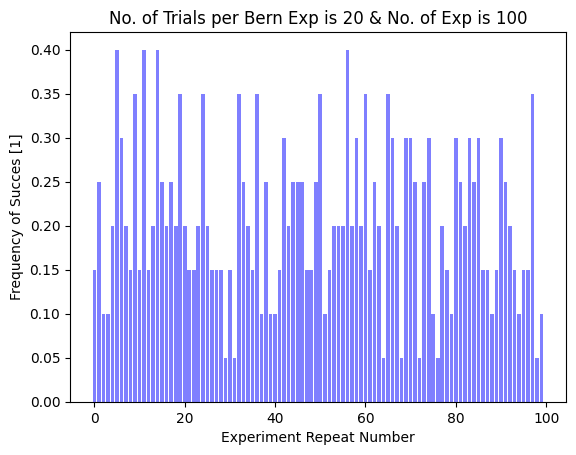

In [284]:
print("Observed value of p = " + str(np.sum(freq_01_arr)/numRepeatsOfExp))

#Plotting the values of 0s and 1s against each experiment repeat on a same figure

import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_bar_graphs(frequencies_1,numRepeatsOfExp=1,numTrialsInAnExp=1):
    x = np.arange(numRepeatsOfExp)  # X-axis values - Experiment Number (0, 1, 2, 3, 4)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plotting the 1s bar graph
    ax.bar(x, frequencies_1, color='blue',width = 0.8, label='Success - 1s',alpha = 0.5)

    # Label the plot
    ax.set_xlabel('Experiment Repeat Number')
    ax.set_ylabel('Frequency of Succes [1]')
    ax.set_title("No. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp is " + str(numRepeatsOfExp))

    # Show the plot
    plt.show()

plot_multiple_bar_graphs(freq_01_arr,numRepeatsOfExp,numTrialsInAnExp)

Observed value of p = 0.207


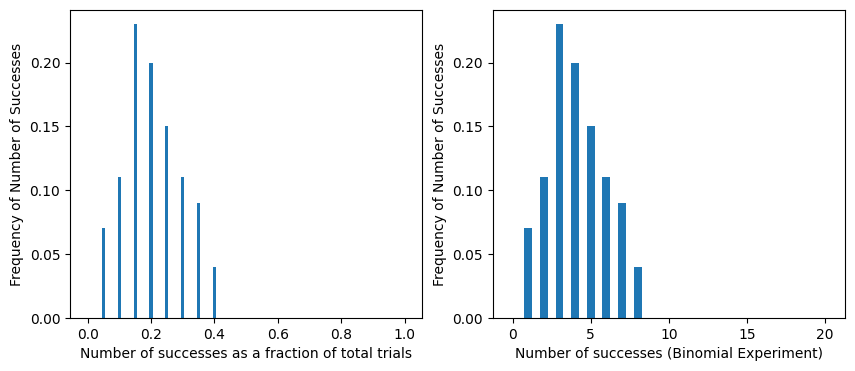

In [285]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False,figsize=(10,4))

histVal = np.histogram(freq_arr, bins=range(0,numTrialsInAnExp+2), density=False)

#print("The histogram values are:", histVal)

ax[0].bar(histVal[1][0:-1]/numTrialsInAnExp, histVal[0]/numRepeatsOfExp, width = 0.01)
ax[0].set_xlabel("Number of successes as a fraction of total trials")
ax[0].set_ylabel("Frequency of Number of Successes")

ax[1].bar(histVal[1][0:-1], histVal[0]/numRepeatsOfExp, width = .5)
ax[1].set_xlabel("Number of successes (Binomial Experiment)")
ax[1].set_ylabel("Frequency of Number of Successes")

print("Observed value of p = " + str(np.sum(freq_01_arr)/numRepeatsOfExp))

Observations -

        - This approximates the Bernauli RV PMF
        - Observed value of p = 0.2035 which is very close to actual PMF value = 0.200
        - As each experiment's outcome is governed by the same Bernoulli(p) RV. As we increase the number of experiments, the histogram of the outcomes of the experiments begins to look more and more like the PMF of the Bernoulli(p) RV.

Ans 1(c)] $(Bernauli RV)$

Steps:


    - We will choose only those experiments from (c) with number of 1s > 3.
    - We will now plot values of 1 corresponding to n values of experiment repeat on X axis & corresponding frequency on Y axis, on same graph


In [286]:
numTrialsInAnExp = 20
numRepeatsOfExp = 100
bernoulliParam_p = 0.2

ber_arr = bernauli(bernoulliParam_p,numTrialsInAnExp,numRepeatsOfExp)
print("The array of observations is (Each row corresponds to an experiment repeat):\n",ber_arr,"\n") 

freq_arr = np.sum(ber_arr,axis=1)
print("Number of ones per experiment of %s trials is:\n" %numTrialsInAnExp,freq_arr,"\n")

#Taking only those experiments with number(Successes) >= 3
freq_arr_modf = [x for x in freq_arr if x >= 3]
num_exp = len(freq_arr_modf)
print("Number of ones >= 3 is in %s experiments:\n" %num_exp,freq_arr_modf,"\n")

freq_01_arr_modf = [x/numTrialsInAnExp for x in freq_arr_modf]
print("Frequency of Success 1s per experiment with 1s >= 3 is:\n" ,freq_01_arr_modf,"\n")

print("Observed value of p = " + str(np.sum(freq_01_arr_modf)/num_exp))


The array of observations is (Each row corresponds to an experiment repeat):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]] 

Number of ones per experiment of 20 trials is:
 [3 5 2 2 4 8 6 4 3 7 3 8 3 4 8 5 4 5 4 7 4 3 3 4 7 4 3 3 3 1 3 1 7 5 4 3 7
 2 5 2 2 3 6 4 5 5 5 3 3 5 7 2 3 4 4 4 8 4 6 4 7 3 5 4 1 7 6 4 1 6 6 5 1 5
 6 2 1 4 3 2 6 5 4 6 5 6 3 3 2 3 6 5 4 3 2 3 3 7 1 2] 

Number of ones >= 3 is in 82 experiments:
 [3, 5, 4, 8, 6, 4, 3, 7, 3, 8, 3, 4, 8, 5, 4, 5, 4, 7, 4, 3, 3, 4, 7, 4, 3, 3, 3, 3, 7, 5, 4, 3, 7, 5, 3, 6, 4, 5, 5, 5, 3, 3, 5, 7, 3, 4, 4, 4, 8, 4, 6, 4, 7, 3, 5, 4, 7, 6, 4, 6, 6, 5, 5, 6, 4, 3, 6, 5, 4, 6, 5, 6, 3, 3, 3, 6, 5, 4, 3, 3, 3, 7] 

Frequency of Success 1s per experiment with 1s >= 3 is:
 [0.15, 0.25, 0.2, 0.4, 0.3, 0.2, 0.15, 0.35, 0.15, 0.4, 0.15, 0.2, 0.4, 0.25, 0.2, 0.25, 0.2, 0.35, 0.2, 0.15, 0.15, 0.2, 0.35, 0.2, 0.15, 0.15, 0.15, 0.15, 0.35, 0.25, 0.2, 0.15, 0.35, 0.25, 0.15,

Observed value of p = 0.2347560975609756


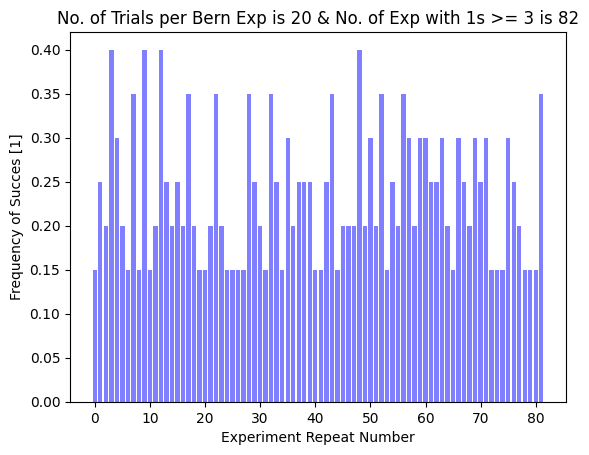

In [287]:
print("Observed value of p = " + str(np.sum(freq_01_arr_modf)/num_exp))

#Plotting the values of 0s and 1s against each experiment repeat on a same figure

import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_bar_graphs(frequencies_1,numRepeatsOfExp=1,numTrialsInAnExp=1):
    x = np.arange(numRepeatsOfExp)  # X-axis values - Experiment Number (0, 1, 2, 3, 4)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plotting the 1s bar graph
    ax.bar(x, frequencies_1, color='blue',width = 0.8, label='Success - 1s',alpha = 0.5)

    # Label the plot
    ax.set_xlabel('Experiment Repeat Number')
    ax.set_ylabel('Frequency of Succes [1]')
    ax.set_title("No. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp with 1s >= 3 is " + str(numRepeatsOfExp))

    # Show the plot
    plt.show()

plot_multiple_bar_graphs(freq_01_arr_modf,num_exp,numTrialsInAnExp)

Text(0, 0.5, 'Frequency of Number of Successes')

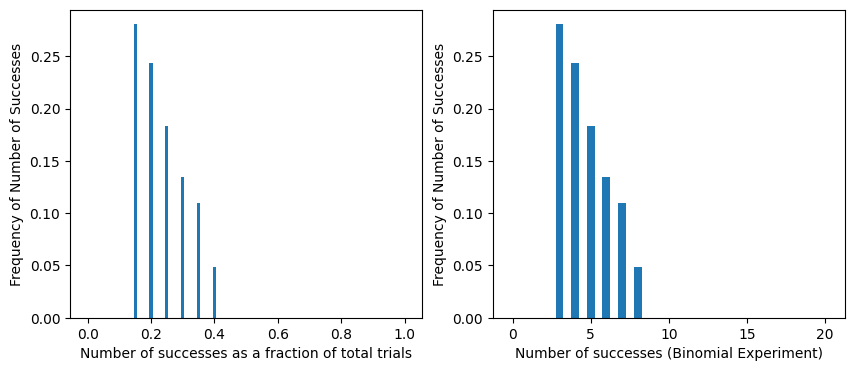

In [288]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False,figsize=(10,4))

histVal = np.histogram(freq_arr_modf, bins=range(0,numTrialsInAnExp+2), density=False)

#print("The histogram values are:", histVal)

ax[0].bar(histVal[1][0:-1]/numTrialsInAnExp, histVal[0]/num_exp, width = 0.01)
ax[0].set_xlabel("Number of successes as a fraction of total trials")
ax[0].set_ylabel("Frequency of Number of Successes")

ax[1].bar(histVal[1][0:-1], histVal[0]/num_exp, width = .5)
ax[1].set_xlabel("Number of successes (Binomial Experiment)")
ax[1].set_ylabel("Frequency of Number of Successes")

Observations -

        - We considered only those experiments in which number of successes > 3 of 20 trials 
        - That means frequency of successes[1] ie p > 3/20 => only those experimnets with p > 0.15
        - This approximates to a conditional PMF conditioned that a mininum of 15% succeses are observed in each experiment.
        - Here p ~ 0.22, which is very close to the orignal value of p = 0.20
        - It is a more closer approximation of the Bernauli PMF

--------------------------------------------------------------------------------------------------------------------------------------------                 
                 
                                                        Question 2

Pick four values of $\alpha$ uniformly and randomly from the interval $(0, 100)$. For each $\alpha$, simulate a Binomial $(n,p)$, with $n$ chosen for the $\alpha$ to be as small as possible while providing a reasonable approximation (the PMFs/ histograms look visually similar) of the Poisson $(\alpha)$. Note that you must also simulate the Poisson RVs. Choose the number of experiements for all the RVs to be large enough to ensure that the resulting histograms are good approximations of the PMFs.

Ans 2) $BinomialRV$

In [289]:
#Genrating 4 values of alpha belong to (0,100)

np.random.seed(42)  # Set the seed value
alpha_list = sorted(np.random.randint(0, 101, size=4))  # Generate random array
print("Random Values of alpha = ",alpha_list)

Random Values of alpha =  [14, 51, 71, 92]


We will perform multiple POSSION experiments for different settings of $\alpha$

In [290]:
#Possion Simulation

#From the help for the function: For events with an expected separation \lambda the Poisson distribution f(k; \lambda) describes the probability of k events occurring within the observed interval \lambda.
#Lam is alpha in the book

np.random.default_rng(8946729)
numberOfExperiments = 100000
alpha = [alpha_list]

outcomesOfPoissonExperiments = np.ndarray((np.shape(alpha)[1],numberOfExperiments))
alphaArray = np.ones((np.shape(alpha)[1],numberOfExperiments))
print("The shapes are ", alphaArray.shape,"\n", outcomesOfPoissonExperiments.shape)
alphaArray = alphaArray * np.transpose(alpha)
print(alphaArray)
outcomesOfPoissonExperiments = np.random.poisson(lam = alphaArray, size=np.shape(outcomesOfPoissonExperiments))
print("The outcomes of experiments are ", outcomesOfPoissonExperiments.shape,"\n", outcomesOfPoissonExperiments)

The shapes are  (4, 100000) 
 (4, 100000)
[[14. 14. 14. ... 14. 14. 14.]
 [51. 51. 51. ... 51. 51. 51.]
 [71. 71. 71. ... 71. 71. 71.]
 [92. 92. 92. ... 92. 92. 92.]]
The outcomes of experiments are  (4, 100000) 
 [[ 15   9  19 ...  16  15  15]
 [ 44  59  45 ...  53  45  54]
 [ 77  83  78 ...  62  68  69]
 [103  84  96 ...  83 100  96]]


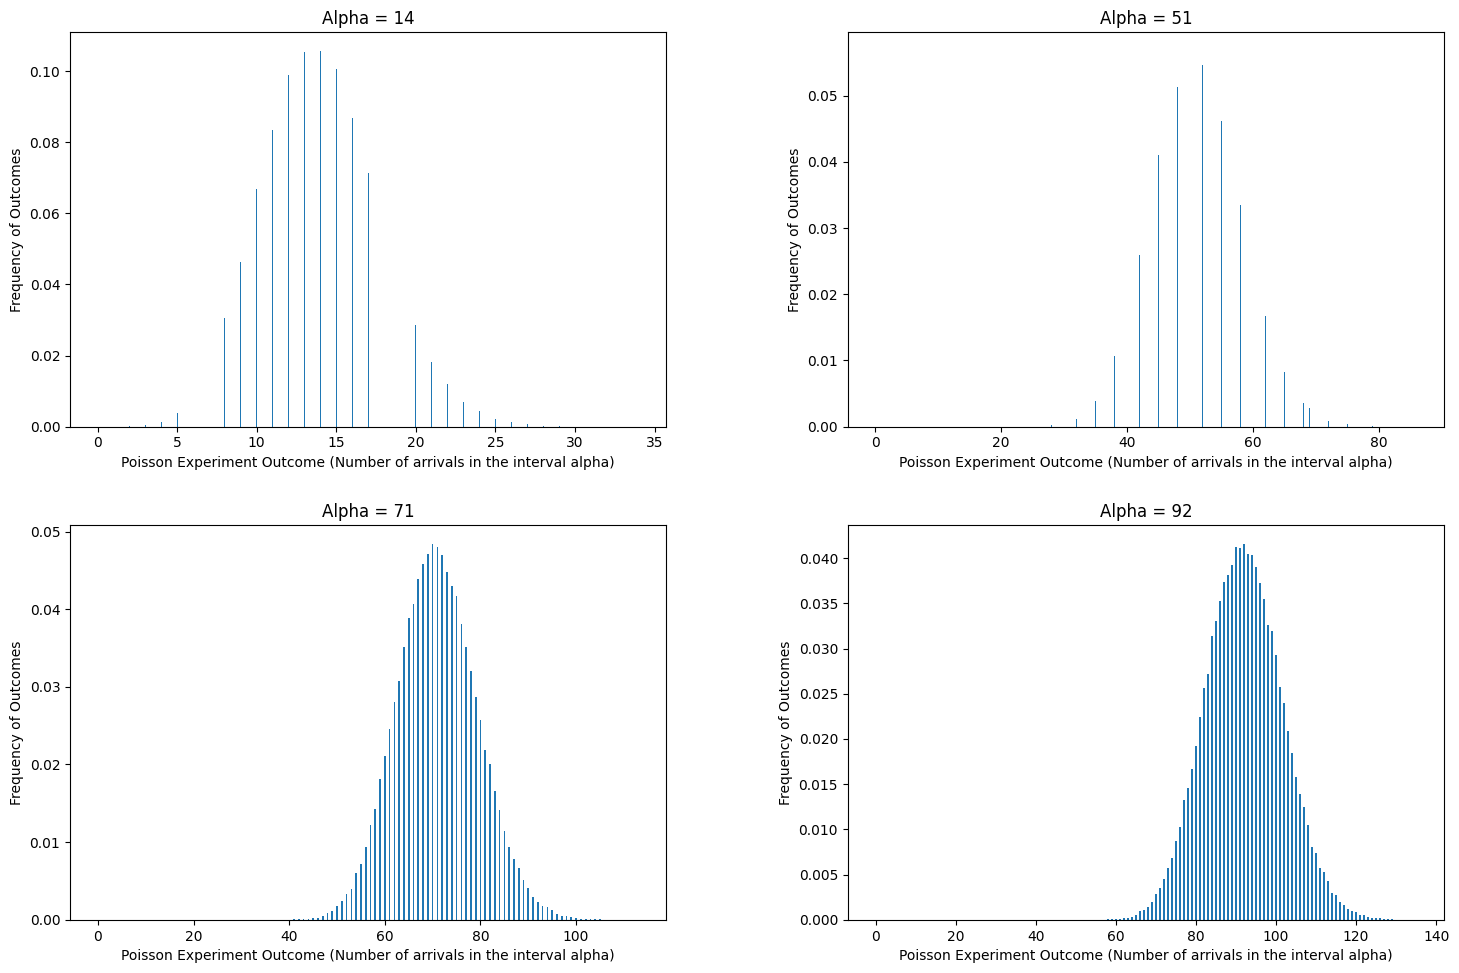

In [291]:
#Possion Graphs


fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))
#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)

obsIdx = 0
widthArr = [0.05, 0.05, 0.35, 0.35]
#widthArr = [0.01, 0.01, 0.005, 0.0009]
#for rowidx in range(int(np.ceil(v_numRepeats/2))):
for rowidx in range(2):
    for colidx in range(2):
        # print("The outcomes are", frequentists[obsIdx], "obsIdx:", obsIdx)
        histVal = np.histogram(outcomesOfPoissonExperiments[obsIdx], bins=range(0,np.max(outcomesOfPoissonExperiments[obsIdx])+2), density=False)
        # print("The histogram[1] values are:", histVal[1])
        # print("The histogram[0] values are:", histVal[0])

        ax[rowidx][colidx].bar(histVal[1][0:-1], histVal[0]/numberOfExperiments, width = widthArr[obsIdx])
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("Poisson Experiment Outcome (Number of arrivals in the interval alpha)")
        ax[rowidx][colidx].set_ylabel("Frequency of Outcomes")
        ax[rowidx][colidx].set_title("Alpha = " + str(alpha[0][obsIdx]))
        obsIdx = obsIdx + 1

The Poisson $(\alpha)$ distribution can be obtained from a Binomial $(n,p)$ in the limit as $n\to \infty$ with $np = \alpha$. We are fixing both the target Poisson and the Binomial to have the same mean by forcing $np = \alpha$, where $np$ is the mean of the Binomial distribution and $\alpha$ is the mean of the Poisson distribution.

$\alpha$ can be thought of as a product of rate $\lambda$ of arrivals (or occurances) of events of interest (for example success or failure, arrival of a student in to a classroom, arrival of a packet to a server, and etc.) and the time interval $T$. We have $\alpha = \lambda T$. 

When modeling the number of occurances of events of interest over time $T$, one can alternatively discretize $T$ into $n$ time slots and model whether the event of interest occurs or not in a slot as a Bernoulli $(p)$ RV. We have $n$ Bernoulli RVs and we are interested in their sum. The sum gives the total number of occurances over $n$ slots (time interval $T$). This sum is distributed as a Binomial $(n,p)$ RV. 

In [292]:
#Defining a function for Binomial RV experiment simulation

def binomial(n,p,numexp=1,ProfitLoss=[1,0],seed=1236):
    observ_arr = np.sum(bernauli(p,n,numexp,ProfitLoss,seed),axis=1)
    return observ_arr

In [293]:
binomial_p = 0.2
binomial_n = [x/binomial_p for x in alpha_list]
numberOfBinomialExps = 10000

outcomes = [0,0,0,0]
freq_arr = [0,0,0,0]
for i in range(len(alpha_list)):
    outcomes[i] = binomial(int(binomial_n[i]),binomial_p,numberOfBinomialExps,[1,0],1236)
    freq_arr[i] = [round(x/binomial_n[i],4) for x in outcomes[i]]
print("Number of successes of %s, per experiment is - \n" %binomial_n, outcomes)
print("Number of successes as a fraction of total trials is - \n",freq_arr)

Number of successes of [70.0, 255.0, 355.0, 460.0], per experiment is - 
 [array([11, 19, 15, ..., 13, 13, 17]), array([58, 59, 47, ..., 64, 51, 57]), array([83, 68, 71, ..., 80, 65, 76]), array([105,  89, 100, ...,  89,  90,  93])]
Number of successes as a fraction of total trials is - 
 [[0.1571, 0.2714, 0.2143, 0.2429, 0.3, 0.2286, 0.2143, 0.1714, 0.1, 0.2429, 0.2143, 0.1286, 0.2571, 0.1857, 0.2429, 0.1714, 0.3, 0.2286, 0.2286, 0.1857, 0.2143, 0.1571, 0.1571, 0.2714, 0.2286, 0.1714, 0.2, 0.1857, 0.1429, 0.1571, 0.2571, 0.1714, 0.1857, 0.2286, 0.1714, 0.2143, 0.1286, 0.1857, 0.2143, 0.2571, 0.2571, 0.2429, 0.2286, 0.1571, 0.3143, 0.1714, 0.1857, 0.1857, 0.1571, 0.2857, 0.2, 0.2857, 0.2429, 0.2143, 0.2286, 0.2571, 0.2286, 0.3429, 0.1571, 0.2143, 0.2, 0.2286, 0.1429, 0.1857, 0.2714, 0.2571, 0.2857, 0.1571, 0.1286, 0.1571, 0.3, 0.2143, 0.2143, 0.1571, 0.2143, 0.2571, 0.1286, 0.2143, 0.2429, 0.1143, 0.1571, 0.2286, 0.2286, 0.1571, 0.2143, 0.1571, 0.2429, 0.2, 0.1571, 0.2429, 0.2, 0.1286,

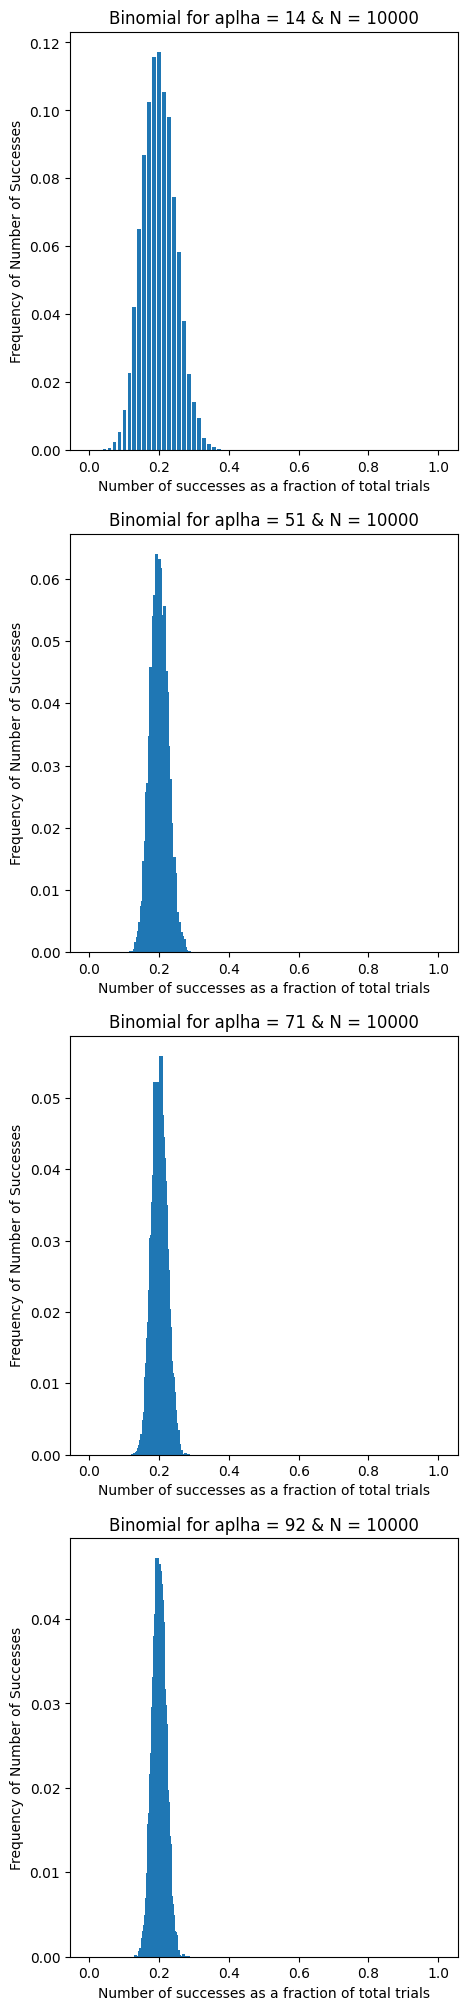

In [294]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=False,figsize=(5,25))
#plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)
for i in range(len(alpha_list)):
    histVal = np.histogram(outcomes[i], bins=range(0,int(binomial_n[i])+2), density=False)
    ax[i].bar(histVal[1][0:-1]/int(binomial_n[i]), histVal[0]/numberOfBinomialExps, width = 0.01)
    ax[i].set_xlabel("Number of successes as a fraction of total trials")
    ax[i].set_ylabel("Frequency of Number of Successes")
    ax[i].set_title("Binomial for aplha = %s & N = %s"%(alpha_list[i],numberOfBinomialExps))

---------------------------------------------------------------------------------------------------------------------------------------------

                                                        Question 3

Illustrate the law of large numbers and the central limit theorem for a sum of iid Poisson RVs. Note that the provided code (Binomial.ipynb) does the same for a sum of Bernoulli $(p)$ RVs.

Do the above for two values of $\alpha$ chosen uniformly and randomly from $(1, 20)$. For each value of $\alpha$ demonstrate the above over an increasing, four long, sequence of number of RVs being added. For example, in the provided code, we simulated $5,10,100,1000$ Bernoulli RVs being summed. Note that you may need a sequence different from the example. Figure out a sequence that shows convergence to a bell shaped curve (central limit theorem) and clustering of the histogram around the mean (law of large numbers).

Ans.] $PossionRV$


On increasing n = numberOfExperiments to a large number so that our histograms are reasonably good approximations of the corresponding PMFs.

As we increase n, we see two trends.

    (1) The histogram becomes more bell shaped. 
    (2) The outcomes concentrate more and more around the mean in the histogram. The spread around the mean reduces as we increase n.

(1) is a consequence of the Central Limit Theorem. Specifically, the distribution of a sum of independent and identically distribution RVs looks more and more like the Gaussian distribution (bell shaped) as the number of RVs being summed increases.

(2) is a consequence of the Law of Large Numbers. Specifically the distribution of the average of a sum of independent and identically distribution RVs (average of $X_1, X_2, \ldots, X_n$ is $(X_1 + X_2 + ... + X_n)/n)$ becomes more and more concentrated and narrow around $E[X_i]$. Note that since the RVs are identically distributed, $E[X_i] = E[X_j]$ for all $i,j$.

In [295]:
frequentists = [[],[]]

numberOfExps = [100,1000,5000,10000]
np.random.seed(42)  # Set the seed value
alpha_list = sorted(np.random.randint(0, 21, size=2))  # Generate random array
print("Random Values of alpha = ",alpha_list)
alpha = alpha_list

for j in range(len(alpha)):
    for i in range(len(numberOfExps)):
        outcomesOfPoissonExperiments = np.ndarray((1,numberOfExps[i]))
        outcomesOfPoissonExperiments = np.random.poisson(lam = alpha[j], size=outcomesOfPoissonExperiments.shape)
        frequentists[j].append(outcomesOfPoissonExperiments)


Random Values of alpha =  [6, 19]


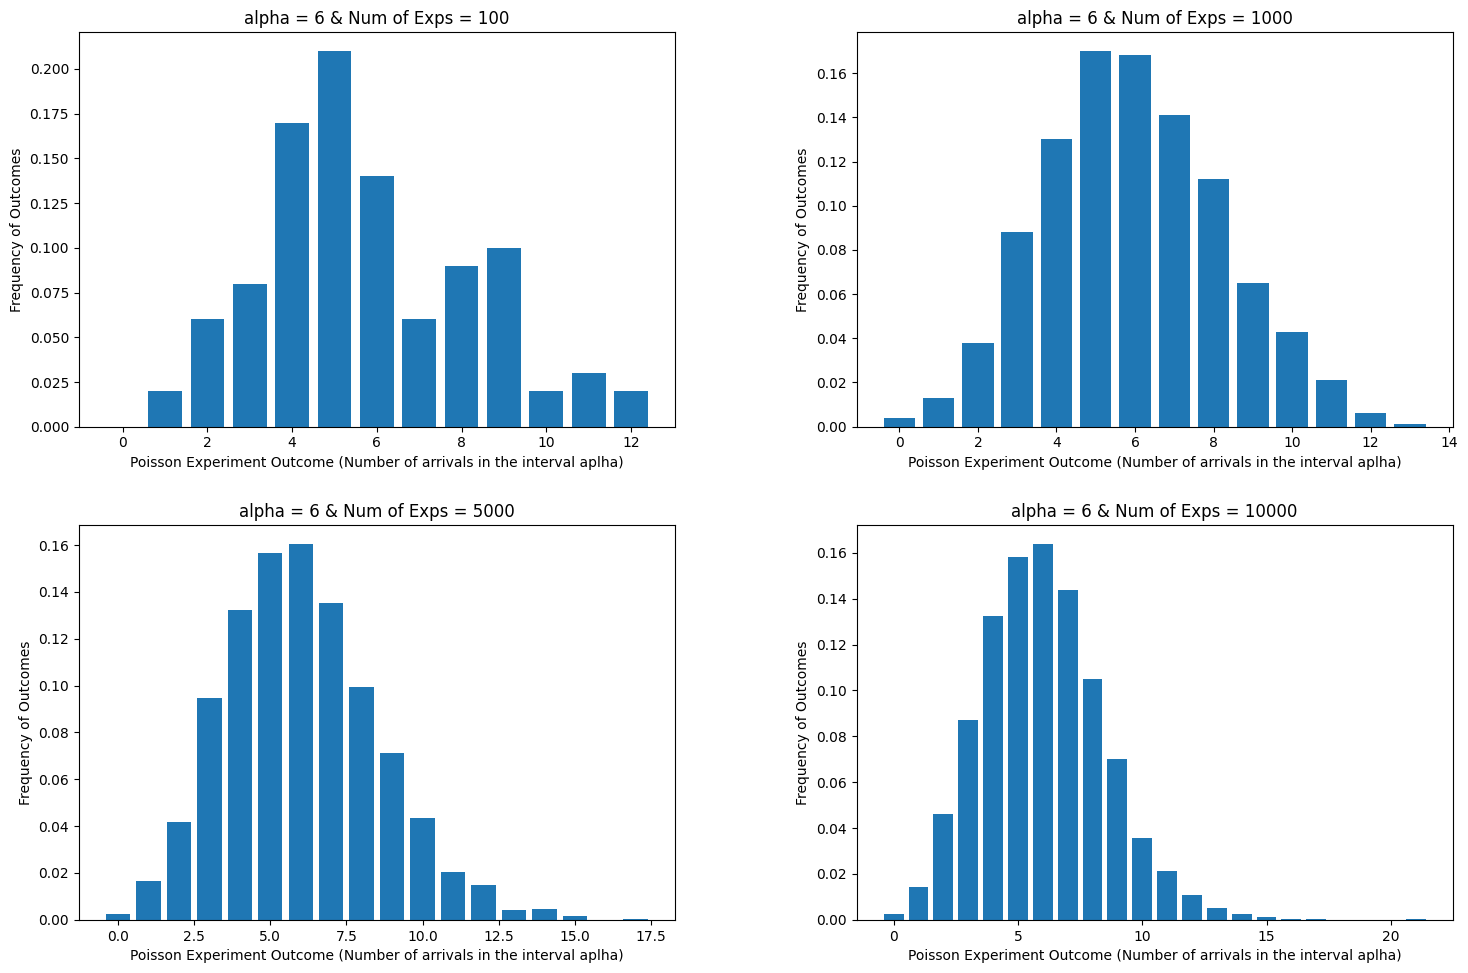

In [296]:

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))
plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)
obsIdx = 0

for rowidx in range(2):
    for colidx in range(2):
        # print("The outcomes are", frequentists[obsIdx], "obsIdx:", obsIdx)
        histVal = np.histogram(frequentists[0][obsIdx], bins=range(0,np.max(frequentists[0][obsIdx])+2), density=False)
        # print("The histogram[1] values are:", histVal[1])
        # print("The histogram[0] values are:", histVal[0])

        ax[rowidx][colidx].bar(histVal[1][0:-1], histVal[0]/numberOfExps[obsIdx], width = 0.6)
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("Poisson Experiment Outcome (Number of arrivals in the interval aplha)")
        ax[rowidx][colidx].set_ylabel("Frequency of Outcomes")
        ax[rowidx][colidx].set_title("alpha = " + str(alpha[0]) + " & Num of Exps = " + str(numberOfExps[obsIdx]))
        obsIdx = obsIdx + 1

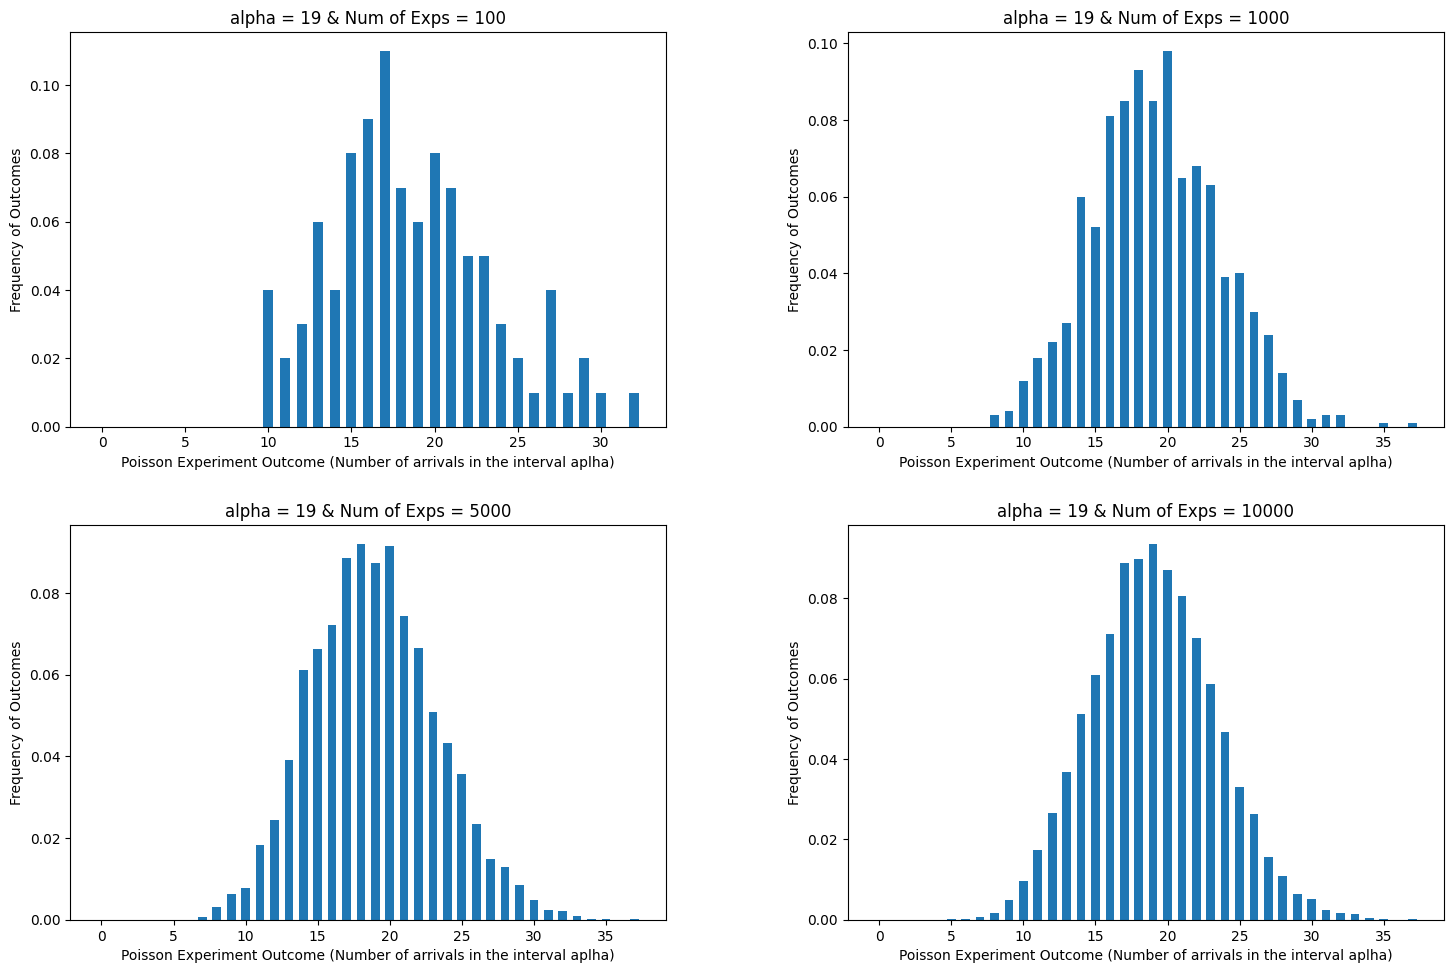

In [297]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))
plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)
obsIdx = 0

for rowidx in range(2):
    for colidx in range(2):
        # print("The outcomes are", frequentists[obsIdx], "obsIdx:", obsIdx)
        histVal = np.histogram(frequentists[1][obsIdx], bins=range(0,np.max(frequentists[1][obsIdx])+2), density=False)
        # print("The histogram[1] values are:", histVal[1])
        # print("The histogram[0] values are:", histVal[0])

        ax[rowidx][colidx].bar(histVal[1][0:-1], histVal[0]/numberOfExps[obsIdx], width = 0.6)
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("Poisson Experiment Outcome (Number of arrivals in the interval aplha)")
        ax[rowidx][colidx].set_ylabel("Frequency of Outcomes")
        ax[rowidx][colidx].set_title("alpha = " + str(alpha[1]) + " & Num of Exps = " + str(numberOfExps[obsIdx]))
        obsIdx = obsIdx + 1